1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over *21 years* at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability, that is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the **upper 2% quantile**.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus, it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

#load the dataset
max_speeds = np.load('max-speeds.npy')
N = max_speeds.shape[0]
print("N:=years_nb:",N)

#cum_prob
cprob = np.array([i/(N+1) for i in range(1,N+1)])
print(cprob)

N:=years_nb: 21
[0.04545455 0.09090909 0.13636364 0.18181818 0.22727273 0.27272727
 0.31818182 0.36363636 0.40909091 0.45454545 0.5        0.54545455
 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727 0.81818182
 0.86363636 0.90909091 0.95454545]


Text(0, 0.5, 'Wind Speed $[m/s]$')

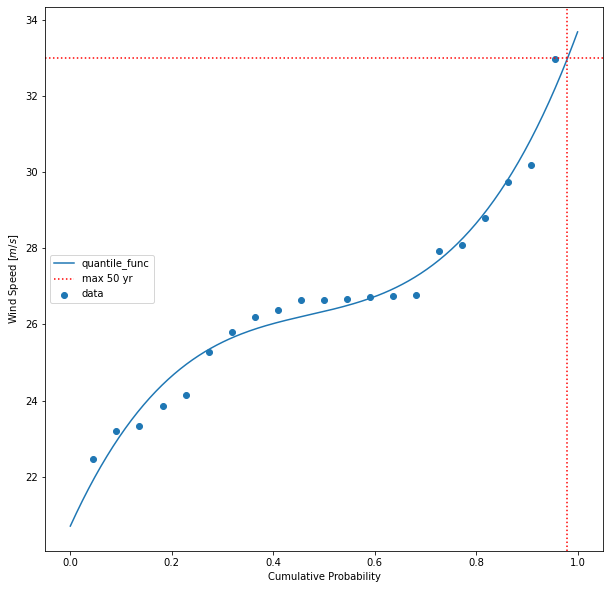

In [45]:
sort_speeds = np.sort(max_speeds)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(cprob,sort_speeds,label='data')

quantile_func = UnivariateSpline(cprob,sort_speeds)
ax1.plot(np.linspace(0,1,250),quantile_func(np.linspace(0,1,250)),label='quantile_func')

fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)

ax1.axvline(fifty_prob,color='r',linestyle=':',label='max 50 yr')
ax1.axhline(fifty_wind,color='r',linestyle=':')
ax1.legend(loc="best")
ax1.set_xlabel('Cumulative Probability')
ax1.set_ylabel('Wind Speed $[m/s]$')

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

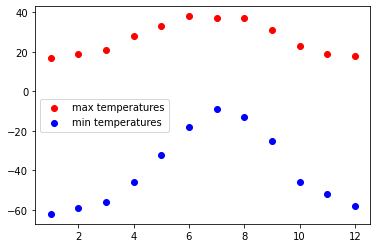

In [57]:
import scipy.optimize as opt

tmp_max = (17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18)
tmp_min = (-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58)
months = np.arange(1,13)

fig2,ax2 = plt.subplots()
ax2.scatter(months,tmp_max,color='r',label='max temperatures')
ax2.scatter(months,tmp_min,color='b',label='min temperatures')
ax2.legend(loc="best")

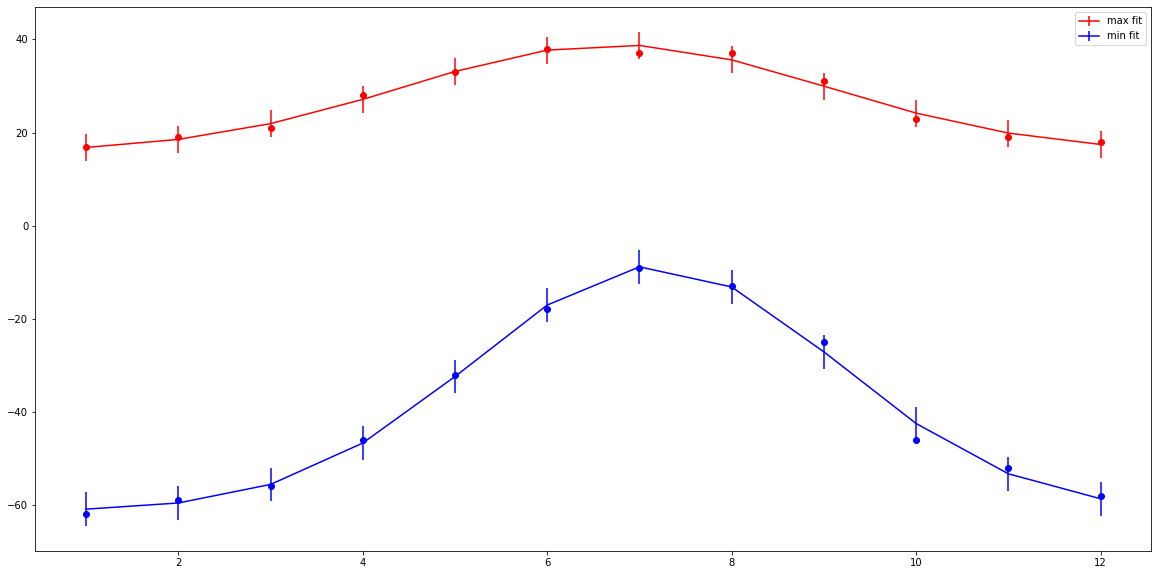

In [87]:
# a gaussian function can describe the min and max temperatures with appropriate offset, heigth, mean and std.
def gaussiana(x,off,coeff,mu,sig):
    g = off + coeff*np.exp(-(x-mu)**2/(2*(sig**2)))
    return g

parmax, covmax = opt.curve_fit(gaussiana,months,tmp_max)
parmin, covmin = opt.curve_fit(gaussiana,months,tmp_min)

def gmax(m): return gaussiana(m,parmax[0],parmax[1],parmax[2],parmax[3])
def gmin(m): return gaussiana(m,parmin[0],parmin[1],parmin[2],parmin[3])

yerr_max = np.sqrt(np.sum([np.abs(tmp_max[i]-gmax(m)) for i,m in enumerate(months)])**2/11)
yerr_min = np.sqrt(np.sum([np.abs(tmp_min[i]-gmin(m)) for i,m in enumerate(months)])**2/11)

#print(yerr_max, yerr_min); print(covmax); print(covmin)

fig3,ax3 = plt.subplots(figsize=(20,10))
ax3.scatter(months,tmp_max,color='r')
ax3.errorbar(months,gaussiana(months,parmax[0],parmax[1],parmax[2],parmax[3]), yerr=yerr_max,color='r',label='max fit')
ax3.scatter(months,tmp_min,color='b')
ax3.errorbar(months,gaussiana(months,parmin[0],parmin[1],parmin[2],parmin[3]), yerr=yerr_min, color='b',label='min fit')
ax3.legend(loc="best")
plt.show()

#the fit is quite well done but since all measured t are in the range of the fit+std

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


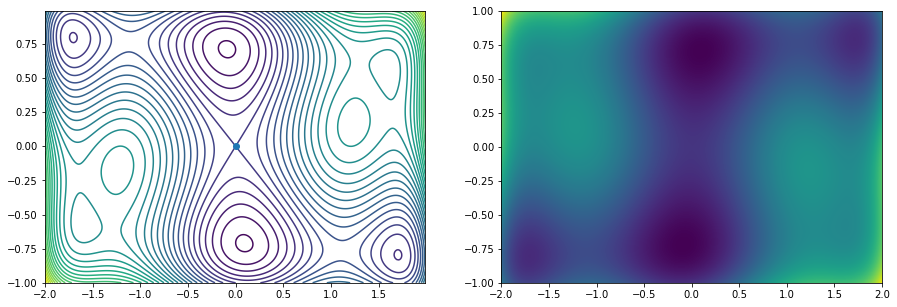

In [59]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import imshow
def func(x,y) :
    return (4.-2.1*x**2+(x**4)/3.)*(x**2) + x*y + 4.0*(y**2-1)*y**2

x,y = np.meshgrid(np.arange(-2.,2.,0.01),np.arange(-1.,1.,0.01))
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
ax2.imshow(func(x,y), cmap="viridis", extent=[-2,2,-1,1], aspect="auto")
ax1.contour(x,y, func(x,y),40)
points=[0.,0.]
ax1.plot(0,0, "o")
plt.show()

Position: [0. 0.] 
Value: 0.0
Position: [ 0.08984226 -0.71265684] 
Value: -1.031628453488207
Position: [-0.08984226  0.71265684] 
Value: -1.031628453488207
Position: [-1.6071049  -0.56865145] 
Value: 2.1042503103113597


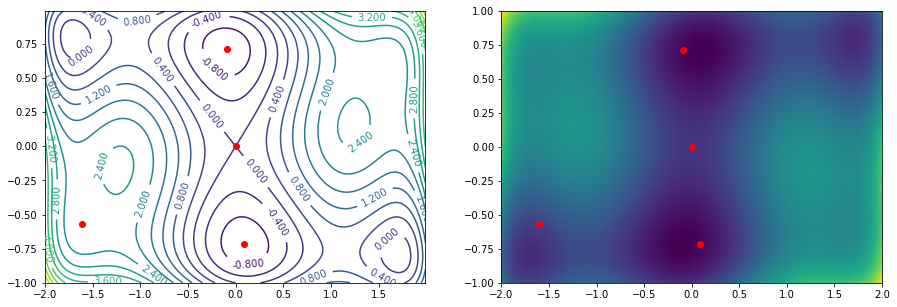

In [62]:
func2 = lambda x: (4.-2.1*x[0]**2+(x[0]**4)/3.)*(x[0]**2) + x[0]*x[1] + 4.0*(x[1]**2-1)*x[1]**2
res1 = opt.minimize(func2, (0.0,0.0), bounds=[(-1,1),(-1,1)])#, method='Powell')
print('Position:', res1.x, '\nValue:', res1.fun)
res2 = opt.minimize(func2, (-1.0,-1.0), bounds=[(-1,1),(-1,1)])#, method='Nelder-Mead’)
print('Position:', res2.x, '\nValue:', res2.fun)
res3 = opt.minimize(func2, (1.0,1.0), bounds=[(-1,1),(-1,1)])#, method='Nelder-Mead’)
print('Position:', res3.x, '\nValue:', res3.fun)
res4 = opt.minimize(func2, (-1.5,-0.75), bounds=[(-2,2),(-1,1)])#, method='Nelder-Mead’)
print('Position:', res4.x, '\nValue:', res4.fun)


x,y = np.meshgrid(np.arange(-2.,2.,0.01),np.arange(-1.,1.,0.01))
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
ax2.imshow(func(x,y), cmap="viridis", extent=[-2,2,-1,1], aspect="auto")
cs = ax1.contour(x,y, func(x,y),20)
ax1.clabel(cs, inline=1, fontsize=10)

ress=[res1,res2,res3,res4]
for ax in [ax1,ax2]:
    for a in ress:
        ax.plot(a.x[0], a.x[1], "ro")
plt.show()

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

In [3]:
import pandas as pd
from scipy import fftpack
pd.set_option('precision', 1)
df = pd.read_csv('populations.txt',delimiter='\t')
df.describe()

,# year,hare,lynx,carrot
count,21.0,21.0,21.0,21.0
mean,1910.0,34081.0,20166.7,42400.0
std,6.2,21414.0,16656.0,3404.6
min,1900.0,7600.0,4000.0,36700.0
25%,1905.0,19500.0,8600.0,39800.0
50%,1910.0,25400.0,12300.0,41800.0
75%,1915.0,47200.0,29700.0,44500.0
max,1920.0,77400.0,59400.0,48300.0


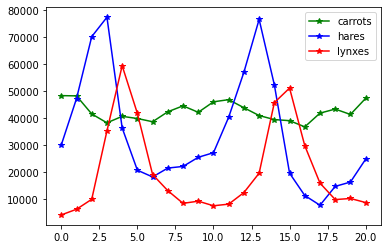

In [6]:
fig5,ax5=plt.subplots()
ax5.plot(df.index,df['carrot'],label='carrots',color='g',marker='*')
ax5.plot(df.index,df['hare'],label='hares',color='b',marker='*')
ax5.plot(df.index,df['lynx'],label='lynxes',color='r',marker='*')
ax5.legend()

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429
 0.33333333 0.38095238 0.42857143 0.47619048]
[ 43153.78711394 270656.13549636   6079.25264315 131023.99485858
   8384.94660598  52023.22933943   5356.30469634  24986.33741813
   5032.52385963  22825.76088643]


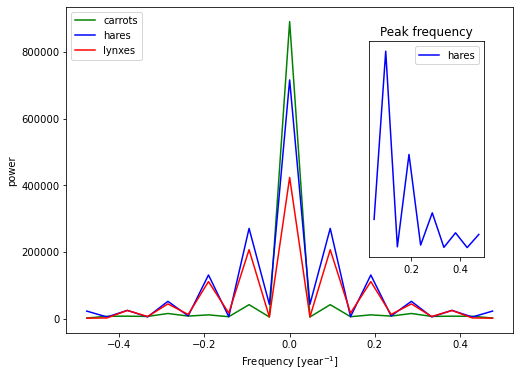

In [31]:
car_ft=fftpack.fft(df['carrot'])
car_power = np.abs(car_ft)
har_ft=fftpack.fft(df['hare'].values)
har_power = np.abs(har_ft)
lyn_ft=fftpack.fft(df['lynx'].values)
lyn_power = np.abs(lyn_ft)

sample_freq = fftpack.fftfreq(df['carrot'].size, d=1)
#print(df.carrot.size==len(sample_freq), sample_freq)
#print(har_power)

#mask the pwr spectur
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
#print(freqs)
#print(har_power[pos_mask])
peak_freq_car = freqs[car_power[pos_mask].argmax()] #select with .argmax the position to find the relative freq
peak_freq_har = freqs[har_power[pos_mask].argmax()]
peak_freq_lyn = freqs[lyn_power[pos_mask].argmax()]


fig6,ax6=plt.subplots(figsize=(8, 6))
#sorting freqs but maintaining the relashioships with car_/gar_/lyn_ power
x,y_car,y_har,y_lyn=zip(*sorted(zip(sample_freq, car_power, har_power, lyn_power))) #--->this proc return a list like [(x),(y_har)]
ax6.plot(x, y_car,label='carrots',color='g')
ax6.plot(x, y_har,label='hares',color='b')
ax6.plot(x, y_lyn,label='lynxes',color='r')
ax6.set_xlabel('Frequency [year$^{-1}$]')
ax6.set_ylabel('power')
ax6.legend(loc=2)

axes = plt.axes([0.65, 0.3, 0.2, 0.5])
plt.title('Peak frequency')
plt.plot(freqs, har_power[pos_mask], label="hares", color="b")
plt.setp(axes, yticks=[])
plt.legend()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

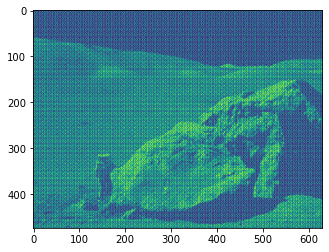

In [90]:
from pylab import imread, imshow
from matplotlib.colors import LogNorm
image = imread('moonlanding.png')
imshow(image)

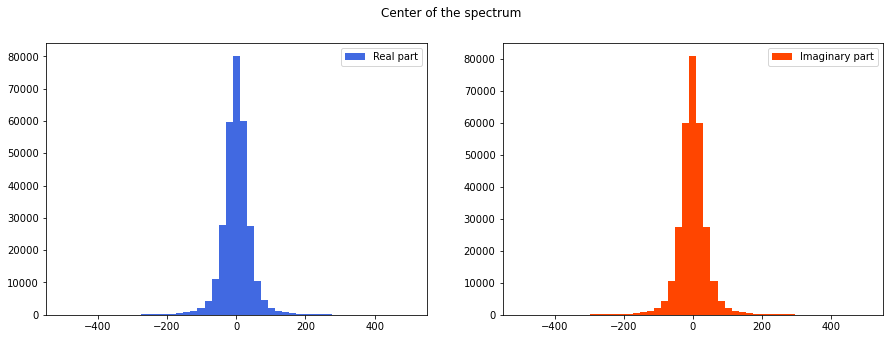

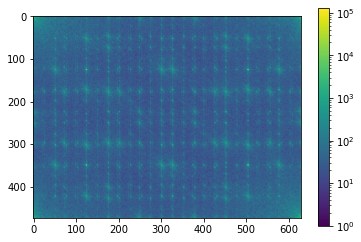

In [83]:
image_fft=fftpack.fft2(image)
cut = 500
bins = np.linspace(-cut, cut)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Center of the spectrum')
ax1.hist(image_fft.real.ravel(), bins, label='Real part', color='royalblue') #ravel = flattening
ax2.hist(image_fft.imag.ravel(), bins, label='Imaginary part', color='orangered')
ax1.legend()
ax2.legend()
plt.show()

image_fft_col=plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=1))  #w/o LogNorm is a blue window
plt.colorbar(image_fft_col)
plt.show()

47.400000000000006 -46.400000000000006


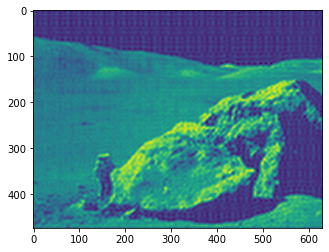

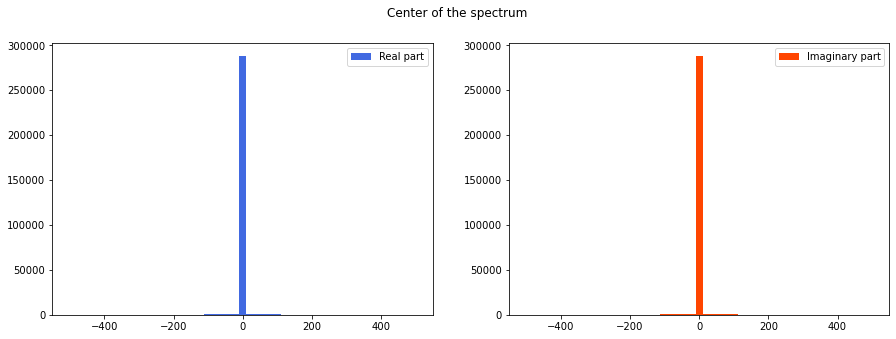

In [105]:
image = imread('moonlanding.png'); image_fft=fftpack.fft2(image)

row,col = image_fft.shape
fltr=.1
print(fltr*row, 1-fltr*row)
image_fft[int(fltr*row):int(1-fltr*row),:]=0
image_fft[:,int(fltr*col):int((1-fltr)*col)]=0

#image_fft[-10:10,:]=0
#image_fft[:,-10:10]=0
#print(image_fft)

image_final=fftpack.ifft2(image_fft)
plt.imshow(image_final.real)

image_fft=fftpack.fft2(image_final)
cut = 500
bins = np.linspace(-cut, cut)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Center of the spectrum')
ax1.hist(image_fft.real.ravel(), bins, label='Real part', color='royalblue') #ravel = flattening
ax2.hist(image_fft.imag.ravel(), bins, label='Imaginary part', color='orangered')
ax1.legend()
ax2.legend()
plt.show()